# PPE-Detection

In [1]:
! pip install ultralytics


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 33.2 MB/s eta 0:00:00


In [2]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="fwUmnyRPCwz4KDuRKJOe")
project = rf.workspace("hx-hezqh").project("ppe-detection-yfmym")
version = project.version(1)
dataset = version.download("yolov11")


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 11.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 41.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 37.7 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.12.0.88
    Uninstalling opencv-python-headless-4.12.0.88:
      Successfully uninstalled opencv-python-headless-4.12.0.88
  Attempting uninstall: idna
    Found existing installation: idna 3.11
    Uninstalling idna-3.11:
      Successfully uninstalled idna-3.11
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to PPE-Detection-1 in yolov11:: 100%|██████████| 4406/4406 [00:00<00:00, 6365.73it/s]


In [3]:
import cv2
from ultralytics import YOLO
from google.colab.patches import cv2_imshow

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [4]:
model = YOLO('yolo11s.pt')
#model.names

In [ ]:
#result = model('/content/4.mp4',save=True,classes=[1,2,3])

In [5]:
model.train(data="/content/PPE-Detection-1/data.yaml", epochs=3, imgsz=640, batch=16)

Ultralytics 8.3.225 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/PPE-Detection-1/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=3, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11s.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, p

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3, 4])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x78814cff9b20>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
        

In [6]:
metrices = model.val()

Ultralytics 8.3.225 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
YOLO11s summary (fused): 100 layers, 9,414,735 parameters, 0 gradients, 21.3 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1968.5±801.8 MB/s, size: 71.1 KB)
val: Scanning /content/PPE-Detection-1/valid/labels.cache... 420 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 420/420 843.7Kit/s 0.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 27/27 3.5it/s 7.7s
                   all        420       1797      0.761      0.723      0.787      0.583
                 boots        276        593       0.86       0.88      0.913      0.635
                gloves         23         41      0.404      0.146      0.261      0.183
                helmet        273        320      0.829      0.903       0.93      0.651
                 human        302        376      0.861      0.841      0.911      0.758
                  vest        354   


image 1/1 /content/original.jpg: 640x640 2 bootss, 1 helmet, 1 human, 1 vest, 15.6ms
Speed: 1.8ms preprocess, 15.6ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


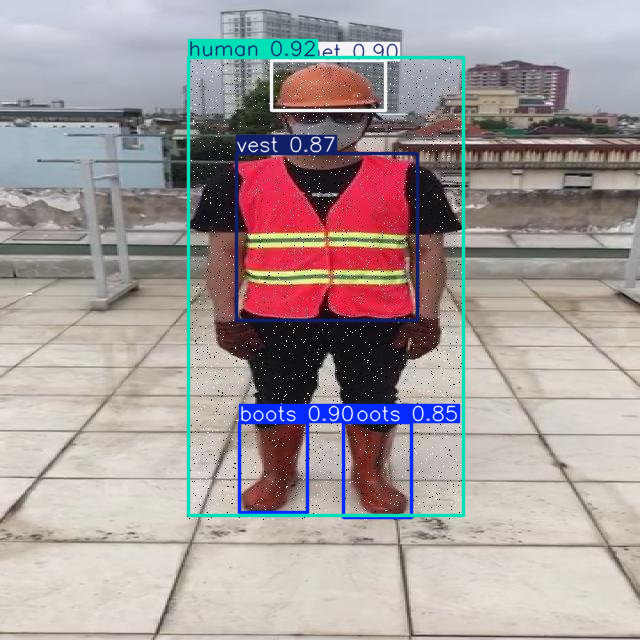

In [7]:
results = model.predict(source="/content/original.jpg", conf=0.5)
results[0].show()


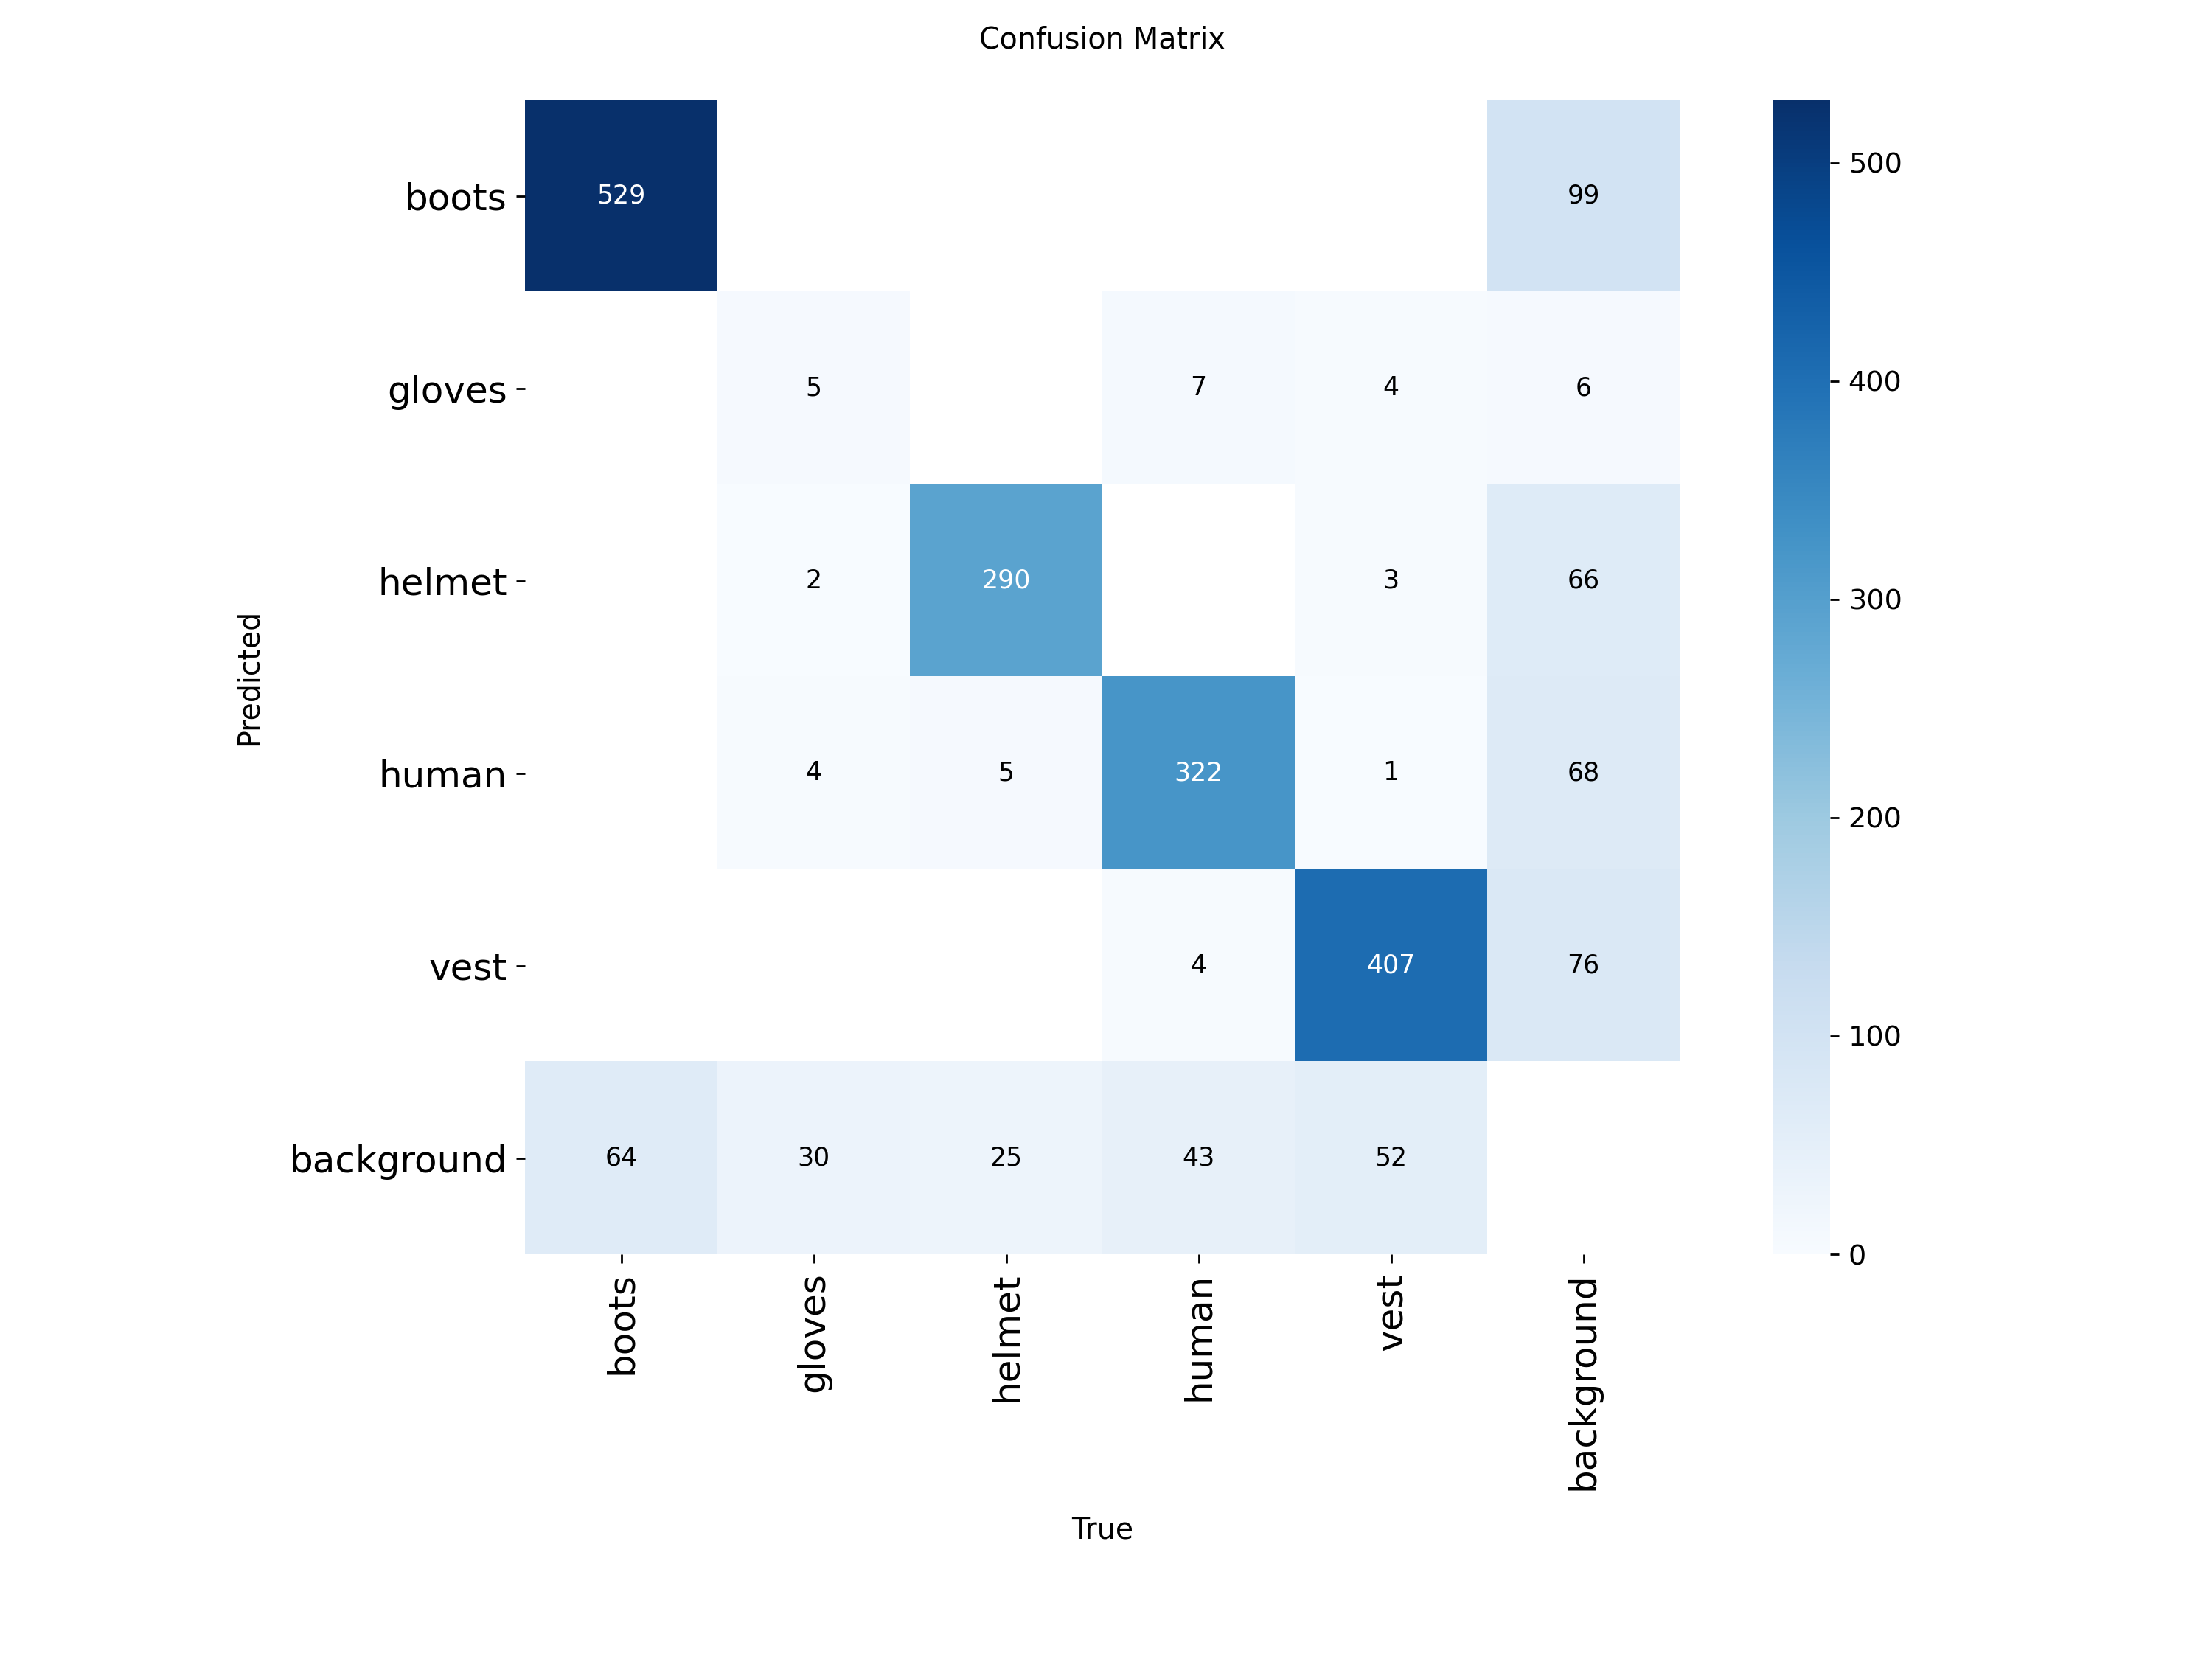

In [9]:
img = cv2.imread('/content/runs/detect/train/confusion_matrix.png')
cv2_imshow(img)

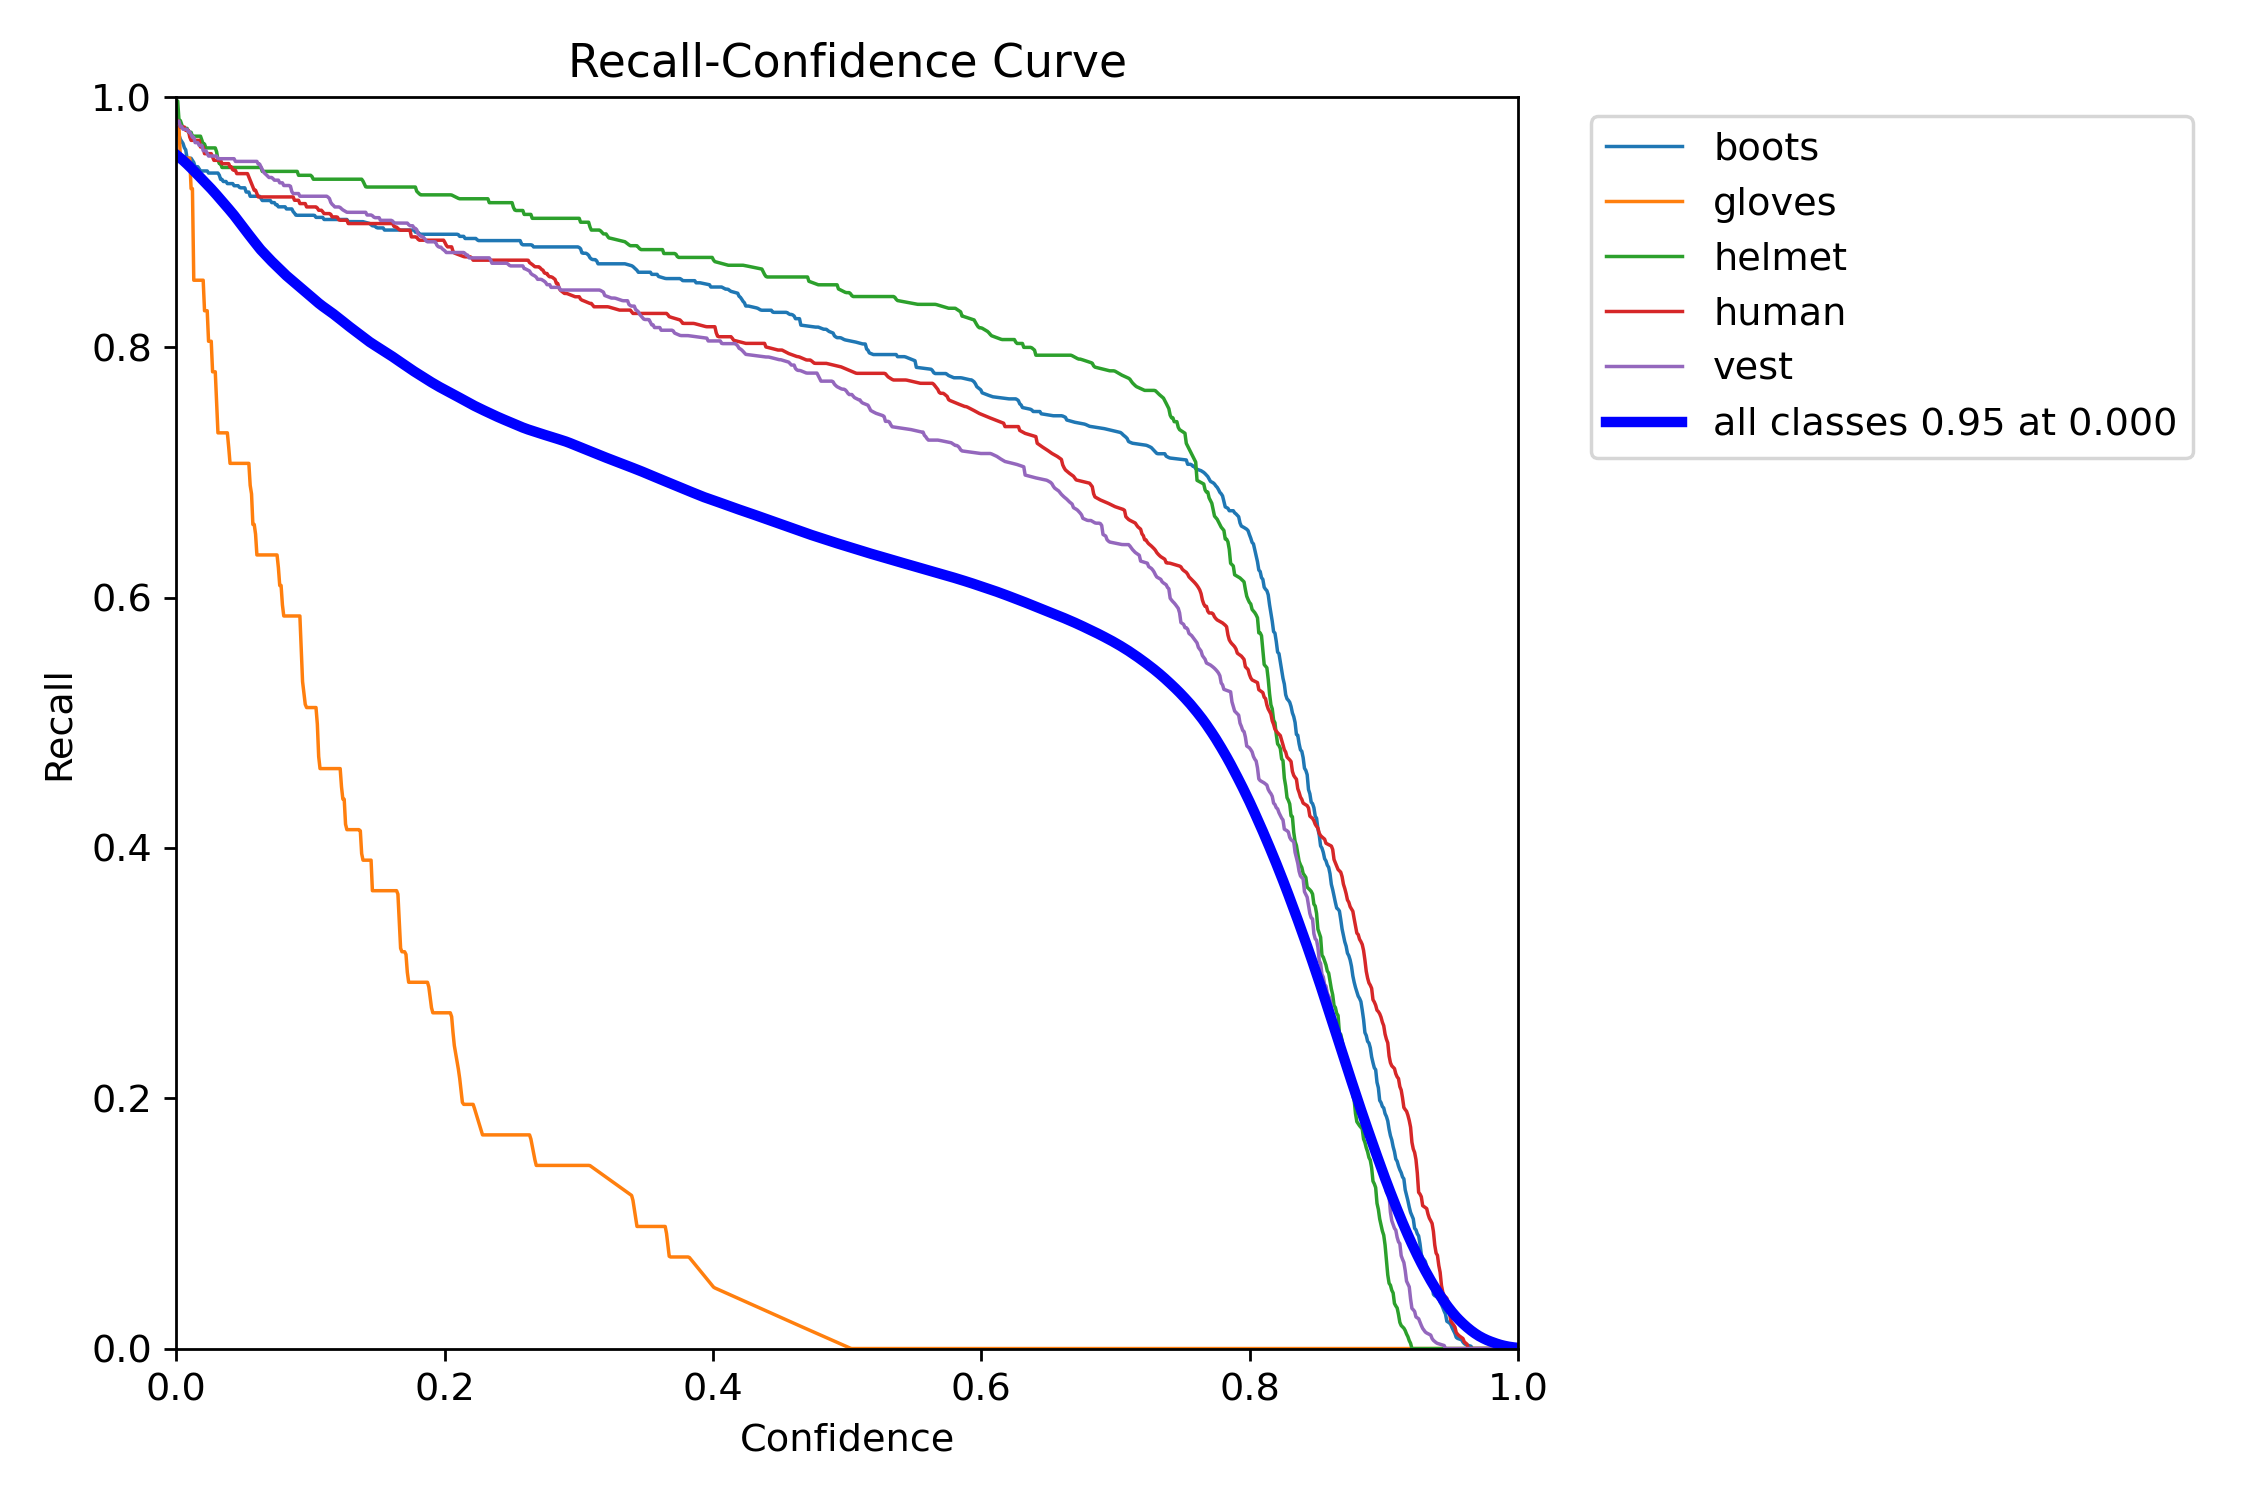

In [11]:
from IPython.display import Image

Image('/content/runs/detect/train/BoxR_curve.png')

In [12]:
results = model.predict(source="/content/PPE Safety Video.mp4", conf=0.5, save=True)
#results[0].show()


WARNING ⚠️ 
inference results will accumulate in RAM unless `stream=True` is passed, causing potential out-of-memory
errors for large sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment masks outputs
        probs = r.probs  # Class probabilities for classification outputs

video 1/1 (frame 1/400) /content/PPE Safety Video.mp4: 640x384 6 helmets, 5 humans, 5 vests, 52.6ms
video 1/1 (frame 2/400) /content/PPE Safety Video.mp4: 640x384 6 helmets, 4 humans, 5 vests, 10.9ms
video 1/1 (frame 3/400) /content/PPE Safety Video.mp4: 640x384 6 helmets, 3 humans, 5 vests, 10.9ms
video 1/1 (frame 4/400) /content/PPE Safety Video.mp4: 640x384 6 helmets, 3 humans, 5 vests, 10.9ms
video 1/1 (frame 5/400) /content/PPE Safety Video.mp4: 6

In [ ]:
from google.colab import files

files.download('/content/PPE Safety Video.mp4')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>